# Keras tutorial - the Happy House

Welcome to the first assignment of week 2. In this assignment, you will:
1. Learn to use Keras, a high-level neural networks API (programming framework), written in Python and capable of running on top of several lower-level frameworks including TensorFlow and CNTK. 
2. See how you can in a couple of hours build a deep learning algorithm.

Why are we using Keras? Keras was developed to enable deep learning engineers to build and experiment with different models very quickly. Just as TensorFlow is a higher-level framework than Python, Keras is an even higher-level framework and provides additional abstractions. Being able to go from idea to result with the least possible delay is key to finding good models. However, Keras is more restrictive than the lower-level frameworks, so there are some very complex models that you can implement in TensorFlow but not (without more difficulty) in Keras. That being said, Keras will work fine for many common models. 

In this exercise, you'll work on the "Happy House" problem, which we'll explain below. Let's load the required packages and solve the problem of the Happy House!

In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

Using TensorFlow backend.


**Note**: As you can see, we've imported a lot of functions from Keras. You can use them easily just by calling them directly in the notebook. Ex: `X = Input(...)` or `X = ZeroPadding2D(...)`.

## 1 - The Happy House 

For your next vacation, you decided to spend a week with five of your friends from school. It is a very convenient house with many things to do nearby. But the most important benefit is that everybody has commited to be happy when they are in the house. So anyone wanting to enter the house must prove their current state of happiness.

<img src="images/happy-house.jpg" style="width:350px;height:270px;">
<caption><center> <u> <font color='purple'> **Figure 1** </u><font color='purple'>  : **the Happy House**</center></caption>


As a deep learning expert, to make sure the "Happy" rule is strictly applied, you are going to build an algorithm which that uses pictures from the front door camera to check if the person is happy or not. The door should open only if the person is happy. 

You have gathered pictures of your friends and yourself, taken by the front-door camera. The dataset is labbeled. 

<img src="images/house-members.png" style="width:550px;height:250px;">

Run the following code to normalize the dataset and learn about its shapes.

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


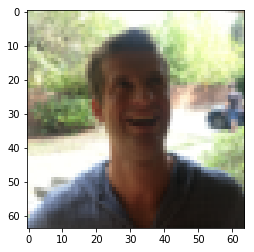

In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

plt.imshow(X_train[3])

**Details of the "Happy" dataset**:
- Images are of shape (64,64,3)
- Training: 600 pictures
- Test: 150 pictures

It is now time to solve the "Happy" Challenge.

## 2 - Building a model in Keras

Keras is very good for rapid prototyping. In just a short time you will be able to build a model that achieves outstanding results.

Here is an example of a model in Keras:

```python
def model(input_shape):
    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='HappyModel')
    
    return model
```

Note that Keras uses a different convention with variable names than we've previously used with numpy and TensorFlow. In particular, rather than creating and assigning a new variable on each step of forward propagation such as `X`, `Z1`, `A1`, `Z2`, `A2`, etc. for the computations for the different layers, in Keras code each line above just reassigns `X` to a new value using `X = ...`. In other words, during each step of forward propagation, we are just writing the latest value in the commputation into the same variable `X`. The only exception was `X_input`, which we kept separate and did not overwrite, since we needed it at the end to create the Keras model instance (`model = Model(inputs = X_input, ...)` above). 

**Exercise**: Implement a `HappyModel()`. This assignment is more open-ended than most. We suggest that you start by implementing a model using the architecture we suggest, and run through the rest of this assignment using that as your initial model. But after that, come back and take initiative to try out other model architectures. For example, you might take inspiration from the model above, but then vary the network architecture and hyperparameters however you wish. You can also use other functions such as `AveragePooling2D()`, `GlobalMaxPooling2D()`, `Dropout()`. 

**Note**: You have to be careful with your data's shapes. Use what you've learned in the videos to make sure your convolutional, pooling and fully-connected layers are adapted to the volumes you're applying it to.

# Here are the `keras.layer` functions you will be using

## `Input`
```
Signature:
Input(
    ['shape=None', 'batch_shape=None', 'name=None', 'dtype=None', 'sparse=False', 'tensor=None'],
)
Docstring:
`Input()` is used to instantiate a Keras tensor.

A Keras tensor is a tensor object from the underlying backend
(Theano, TensorFlow or CNTK), which we augment with certain
attributes that allow us to build a Keras model
just by knowing the inputs and outputs of the model.

For instance, if a, b and c are Keras tensors,
it becomes possible to do:
`model = Model(input=[a, b], output=c)`

The added Keras attributes are:
    `_keras_shape`: Integer shape tuple propagated
        via Keras-side shape inference.
    `_keras_history`: Last layer applied to the tensor.
        the entire layer graph is retrievable from that layer,
        recursively.

# Arguments
    shape: A shape tuple (integer), not including the batch size.
        For instance, `shape=(32,)` indicates that the expected input
        will be batches of 32-dimensional vectors.
    batch_shape: A shape tuple (integer), including the batch size.
        For instance, `batch_shape=(10, 32)` indicates that
        the expected input will be batches of 10 32-dimensional vectors.
        `batch_shape=(None, 32)` indicates batches of an arbitrary number
        of 32-dimensional vectors.
    name: An optional name string for the layer.
        Should be unique in a model (do not reuse the same name twice).
        It will be autogenerated if it isn't provided.
    dtype: The data type expected by the input, as a string
        (`float32`, `float64`, `int32`...)
    sparse: A boolean specifying whether the placeholder
        to be created is sparse.
    tensor: Optional existing tensor to wrap into the `Input` layer.
        If set, the layer will not create a placeholder tensor.

# Returns
    A tensor
```

## `ZeroPadding2D`
```
Init signature: ZeroPadding2D(padding=(1, 1), data_format=None, **kwargs)
Docstring:     
Zero-padding layer for 2D input (e.g. picture).

This layer can add rows and columns of zeros
at the top, bottom, left and right side of an image tensor.

# Arguments
    padding: int, or tuple of 2 ints, or tuple of 2 tuples of 2 ints.
        - If int: the same symmetric padding
            is applied to height and width.
        - If tuple of 2 ints:
            interpreted as two different
            symmetric padding values for height and width:
            `(symmetric_height_pad, symmetric_width_pad)`.
        - If tuple of 2 tuples of 2 ints:
            interpreted as
            `((top_pad, bottom_pad), (left_pad, right_pad))`
    data_format: A string,
        one of `"channels_last"` or `"channels_first"`.
        The ordering of the dimensions in the inputs.
        `"channels_last"` corresponds to inputs with shape
        `(batch, height, width, channels)` while `"channels_first"`
        corresponds to inputs with shape
        `(batch, channels, height, width)`.
        It defaults to the `image_data_format` value found in your
        Keras config file at `~/.keras/keras.json`.
        If you never set it, then it will be "channels_last".

# Input shape
    4D tensor with shape:
    - If `data_format` is `"channels_last"`:
        `(batch, rows, cols, channels)`
    - If `data_format` is `"channels_first"`:
        `(batch, channels, rows, cols)`

# Output shape
    4D tensor with shape:
    - If `data_format` is `"channels_last"`:
        `(batch, padded_rows, padded_cols, channels)`
    - If `data_format` is `"channels_first"`:
        `(batch, channels, padded_rows, padded_cols)`
```
        
## Conv2D
```
Init signature:
Conv2D(
    ['filters', 'kernel_size', 'strides=(1, 1)', "padding='valid'", 'data_format=None', 'dilation_rate=(1, 1)', 'activation=None', 'use_bias=True', "kernel_initializer='glorot_uniform'", "bias_initializer='zeros'", 'kernel_regularizer=None', 'bias_regularizer=None', 'activity_regularizer=None', 'kernel_constraint=None', 'bias_constraint=None', '**kwargs'],
)
Docstring:     
2D convolution layer (e.g. spatial convolution over images).

This layer creates a convolution kernel that is convolved
with the layer input to produce a tensor of
outputs. If `use_bias` is True,
a bias vector is created and added to the outputs. Finally, if
`activation` is not `None`, it is applied to the outputs as well.

When using this layer as the first layer in a model,
provide the keyword argument `input_shape`
(tuple of integers, does not include the sample axis),
e.g. `input_shape=(128, 128, 3)` for 128x128 RGB pictures
in `data_format="channels_last"`.

# Arguments
    filters: Integer, the dimensionality of the output space
        (i.e. the number of output filters in the convolution).
    kernel_size: An integer or tuple/list of 2 integers, specifying the
        height and width of the 2D convolution window.
        Can be a single integer to specify the same value for
        all spatial dimensions.
    strides: An integer or tuple/list of 2 integers,
        specifying the strides of the convolution
        along the height and width.
        Can be a single integer to specify the same value for
        all spatial dimensions.
        Specifying any stride value != 1 is incompatible with specifying
        any `dilation_rate` value != 1.
    padding: one of `"valid"` or `"same"` (case-insensitive).
        Note that `"same"` is slightly inconsistent across backends with
        `strides` != 1, as described
        [here](https://github.com/keras-team/keras/pull/9473#issuecomment-372166860)
    data_format: A string,
        one of `"channels_last"` or `"channels_first"`.
        The ordering of the dimensions in the inputs.
        `"channels_last"` corresponds to inputs with shape
        `(batch, height, width, channels)` while `"channels_first"`
        corresponds to inputs with shape
        `(batch, channels, height, width)`.
        It defaults to the `image_data_format` value found in your
        Keras config file at `~/.keras/keras.json`.
        If you never set it, then it will be "channels_last".
    dilation_rate: an integer or tuple/list of 2 integers, specifying
        the dilation rate to use for dilated convolution.
        Can be a single integer to specify the same value for
        all spatial dimensions.
        Currently, specifying any `dilation_rate` value != 1 is
        incompatible with specifying any stride value != 1.
    activation: Activation function to use
        (see [activations](../activations.md)).
        If you don't specify anything, no activation is applied
        (ie. "linear" activation: `a(x) = x`).
    use_bias: Boolean, whether the layer uses a bias vector.
    kernel_initializer: Initializer for the `kernel` weights matrix
        (see [initializers](../initializers.md)).
    bias_initializer: Initializer for the bias vector
        (see [initializers](../initializers.md)).
    kernel_regularizer: Regularizer function applied to
        the `kernel` weights matrix
        (see [regularizer](../regularizers.md)).
    bias_regularizer: Regularizer function applied to the bias vector
        (see [regularizer](../regularizers.md)).
    activity_regularizer: Regularizer function applied to
        the output of the layer (its "activation").
        (see [regularizer](../regularizers.md)).
    kernel_constraint: Constraint function applied to the kernel matrix
        (see [constraints](../constraints.md)).
    bias_constraint: Constraint function applied to the bias vector
        (see [constraints](../constraints.md)).

# Input shape
    4D tensor with shape:
    `(batch, channels, rows, cols)`
    if `data_format` is `"channels_first"`
    or 4D tensor with shape:
    `(batch, rows, cols, channels)`
    if `data_format` is `"channels_last"`.

# Output shape
    4D tensor with shape:
    `(batch, filters, new_rows, new_cols)`
    if `data_format` is `"channels_first"`
    or 4D tensor with shape:
    `(batch, new_rows, new_cols, filters)`
    if `data_format` is `"channels_last"`.
    `rows` and `cols` values might have changed due to padding.
```

## `BatchNormalization`
```
Init signature:
BatchNormalization(
    ['axis=-1', 'momentum=0.99', 'epsilon=0.001', 'center=True', 'scale=True', "beta_initializer='zeros'", "gamma_initializer='ones'", "moving_mean_initializer='zeros'", "moving_variance_initializer='ones'", 'beta_regularizer=None', 'gamma_regularizer=None', 'beta_constraint=None', 'gamma_constraint=None', '**kwargs'],
)
Docstring:     
Batch normalization layer (Ioffe and Szegedy, 2014).

Normalize the activations of the previous layer at each batch,
i.e. applies a transformation that maintains the mean activation
close to 0 and the activation standard deviation close to 1.

# Arguments
    axis: Integer, the axis that should be normalized
        (typically the features axis).
        For instance, after a `Conv2D` layer with
        `data_format="channels_first"`,
        set `axis=1` in `BatchNormalization`.
    momentum: Momentum for the moving mean and the moving variance.
    epsilon: Small float added to variance to avoid dividing by zero.
    center: If True, add offset of `beta` to normalized tensor.
        If False, `beta` is ignored.
    scale: If True, multiply by `gamma`.
        If False, `gamma` is not used.
        When the next layer is linear (also e.g. `nn.relu`),
        this can be disabled since the scaling
        will be done by the next layer.
    beta_initializer: Initializer for the beta weight.
    gamma_initializer: Initializer for the gamma weight.
    moving_mean_initializer: Initializer for the moving mean.
    moving_variance_initializer: Initializer for the moving variance.
    beta_regularizer: Optional regularizer for the beta weight.
    gamma_regularizer: Optional regularizer for the gamma weight.
    beta_constraint: Optional constraint for the beta weight.
    gamma_constraint: Optional constraint for the gamma weight.

# Input shape
    Arbitrary. Use the keyword argument `input_shape`
    (tuple of integers, does not include the samples axis)
    when using this layer as the first layer in a model.

# Output shape
    Same shape as input.
```

## `Activation`
```
Init signature: Activation(activation, **kwargs)
Docstring:     
Applies an activation function to an output.

# Arguments
    activation: name of activation function to use
        (see: [activations](../activations.md)),
        or alternatively, a Theano or TensorFlow operation.

# Input shape
    Arbitrary. Use the keyword argument `input_shape`
    (tuple of integers, does not include the samples axis)
    when using this layer as the first layer in a model.

# Output shape
    Same shape as input.
```

## MaxPooling2D
```
Init signature:
MaxPooling2D(
    ['pool_size=(2, 2)', 'strides=None', "padding='valid'", 'data_format=None', '**kwargs'],
)
Docstring:     
Max pooling operation for spatial data.

# Arguments
    pool_size: integer or tuple of 2 integers,
        factors by which to downscale (vertical, horizontal).
        (2, 2) will halve the input in both spatial dimension.
        If only one integer is specified, the same window length
        will be used for both dimensions.
    strides: Integer, tuple of 2 integers, or None.
        Strides values.
        If None, it will default to `pool_size`.
    padding: One of `"valid"` or `"same"` (case-insensitive).
    data_format: A string,
        one of `channels_last` (default) or `channels_first`.
        The ordering of the dimensions in the inputs.
        `channels_last` corresponds to inputs with shape
        `(batch, height, width, channels)` while `channels_first`
        corresponds to inputs with shape
        `(batch, channels, height, width)`.
        It defaults to the `image_data_format` value found in your
        Keras config file at `~/.keras/keras.json`.
        If you never set it, then it will be "channels_last".

# Input shape
    - If `data_format='channels_last'`:
        4D tensor with shape:
        `(batch_size, rows, cols, channels)`
    - If `data_format='channels_first'`:
        4D tensor with shape:
        `(batch_size, channels, rows, cols)`

# Output shape
    - If `data_format='channels_last'`:
        4D tensor with shape:
        `(batch_size, pooled_rows, pooled_cols, channels)`
    - If `data_format='channels_first'`:
        4D tensor with shape:
        `(batch_size, channels, pooled_rows, pooled_cols)`
```

## `Flatten`
```
Init signature: Flatten(data_format=None, **kwargs)
Docstring:     
Flattens the input. Does not affect the batch size.

# Arguments
    data_format: A string,
        one of `channels_last` (default) or `channels_first`.
        The ordering of the dimensions in the inputs.
        The purpose of this argument is to preserve weight
        ordering when switching a model from one data format
        to another.
        `channels_last` corresponds to inputs with shape
        `(batch, ..., channels)` while `channels_first` corresponds to
        inputs with shape `(batch, channels, ...)`.
        It defaults to the `image_data_format` value found in your
        Keras config file at `~/.keras/keras.json`.
        If you never set it, then it will be "channels_last".
```
## `Dense`
```
Init signature:
Dense(
    ['units', 'activation=None', 'use_bias=True', "kernel_initializer='glorot_uniform'", "bias_initializer='zeros'", 'kernel_regularizer=None', 'bias_regularizer=None', 'activity_regularizer=None', 'kernel_constraint=None', 'bias_constraint=None', '**kwargs'],
)
Docstring:     
Just your regular densely-connected NN layer.

`Dense` implements the operation:
`output = activation(dot(input, kernel) + bias)`
where `activation` is the element-wise activation function
passed as the `activation` argument, `kernel` is a weights matrix
created by the layer, and `bias` is a bias vector created by the layer
(only applicable if `use_bias` is `True`).

Note: if the input to the layer has a rank greater than 2, then
it is flattened prior to the initial dot product with `kernel`.


# Arguments
    units: Positive integer, dimensionality of the output space.
    activation: Activation function to use
        (see [activations](../activations.md)).
        If you don't specify anything, no activation is applied
        (ie. "linear" activation: `a(x) = x`).
    use_bias: Boolean, whether the layer uses a bias vector.
    kernel_initializer: Initializer for the `kernel` weights matrix
        (see [initializers](../initializers.md)).
    bias_initializer: Initializer for the bias vector
        (see [initializers](../initializers.md)).
    kernel_regularizer: Regularizer function applied to
        the `kernel` weights matrix
        (see [regularizer](../regularizers.md)).
    bias_regularizer: Regularizer function applied to the bias vector
        (see [regularizer](../regularizers.md)).
    activity_regularizer: Regularizer function applied to
        the output of the layer (its "activation").
        (see [regularizer](../regularizers.md)).
    kernel_constraint: Constraint function applied to
        the `kernel` weights matrix
        (see [constraints](../constraints.md)).
    bias_constraint: Constraint function applied to the bias vector
        (see [constraints](../constraints.md)).

# Input shape
    nD tensor with shape: `(batch_size, ..., input_dim)`.
    The most common situation would be
    a 2D input with shape `(batch_size, input_dim)`.

# Output shape
    nD tensor with shape: `(batch_size, ..., units)`.
    For instance, for a 2D input with shape `(batch_size, input_dim)`,
    the output would have shape `(batch_size, units)`.
```
## `Model`
```
Init signature: Model(*args, **kwargs)
Docstring:     
The `Model` class adds training & evaluation routines to a `Network`.
```

In [41]:
#from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
#from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D

In [3]:
# GRADED FUNCTION: HappyModel

def HappyModel(input_shape, kernel_size=(3,3), strides=(1, 1), padding='SAME', bn_axis=1):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    
    ### START CODE HERE ###
    # Feel free to use the suggested outline in the text above to get started, and run through the whole
    # exercise (including the later portions of this notebook) once. The come back also try out other
    # network architectures as well. 
        # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, kernel_size=kernel_size, strides=strides, padding=padding, name='conv0')(X)
    X = BatchNormalization(axis=bn_axis, name='bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs=X_input, outputs=X, name='HappyModel')

    return model

You have now built a function to describe your model. To train and test this model, there are four steps in Keras:
1. Create the model by calling the function above
2. Compile the model by calling `model.compile(optimizer = "...", loss = "...", metrics = ["accuracy"])`
3. Train the model on train data by calling `model.fit(x = ..., y = ..., epochs = ..., batch_size = ...)`
4. Test the model on test data by calling `model.evaluate(x = ..., y = ...)`

If you want to know more about `model.compile()`, `model.fit()`, `model.evaluate()` and their arguments, refer to the official [Keras documentation](https://keras.io/models/model/).

**Exercise**: Implement step 1, i.e. create the model.

### Expected number of parameters:
**Conv2D:** 
- Should have filt_size * nc_0 filters * nc_1 filters = (3*3 *3 * 32) weights in conv2d layer
- `(3*3*32*3) = 896`

**BatchNormalization**
- Note that (as discussed in course 1) batch normalization includes gamma and beta terms FOR EACH ELEMENT: `Z_tilde[i] = gamma * Z_norm[i] + beta`. This is so that **THE MODEL CAN LEARN THE DISTRIBUTION OF THE WEIGHTS BEFORE ACTIVATION!!!**
- As such, the previous layer has 68 elements, across 32 filters. We use the `axis` parameter to determine across which axis we want to normalize our data. So in the case below, we normalize across axis 3 (the number of filters).
- Because there re 32 filters, for each filter we will need a gamma and beta hyperparameter, as well as a moving-mean, and moving-variance (the latter two are non-trainable). 
- In total, we need 32\*4 hyperparameters. Only 64 are trainable!

**Dense (fully connected)**
- This layer is fairly straightforward: we flatten the previous max_pooling layer, that gets us 36992 values
- Then we simple connec them all to a single neuron, and add a bias term, resulting in 36993 trainable weights (parameters)


In [5]:
### START CODE HERE ### (1 line)
print(X_train.shape[1:])
happyModel = HappyModel(X_train.shape[1:], padding='VALID', bn_axis=3)
happyModel.summary()
### END CODE HERE ###

(64, 64, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 68, 68, 32)        896       
_________________________________________________________________
bn0 (BatchNormalization)     (None, 68, 68, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 68, 68, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 34, 34, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 36992)             0        

**Exercise**: Implement step 2, i.e. compile the model to configure the learning process. Choose the 3 arguments of `compile()` wisely. Hint: the Happy Challenge is a binary classification problem.

In [83]:
### START CODE HERE ### (1 line)
happyModel.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
### END CODE HERE ###

**Exercise**: Implement step 3, i.e. train the model. Choose the number of epochs and the batch size.

In [84]:
### START CODE HERE ### (1 line)
happyModel.fit(X_train, Y_train, epochs=40, batch_size=50)
### END CODE HERE ###

Epoch 1/40
600/600 [==============================] - 8s 14ms/step - loss: 1.6794 - acc: 0.6083
Epoch 2/40
600/600 [==============================] - 8s 13ms/step - loss: 0.4559 - acc: 0.8067
Epoch 3/40
600/600 [==============================] - 9s 15ms/step - loss: 0.2708 - acc: 0.8833
Epoch 4/40
600/600 [==============================] - 9s 15ms/step - loss: 0.1323 - acc: 0.9500
Epoch 5/40
600/600 [==============================] - 9s 15ms/step - loss: 0.1018 - acc: 0.9700
Epoch 6/40
600/600 [==============================] - 9s 15ms/step - loss: 0.0945 - acc: 0.9767
Epoch 7/40
600/600 [==============================] - 9s 15ms/step - loss: 0.0785 - acc: 0.9833
Epoch 8/40
600/600 [==============================] - 9s 16ms/step - loss: 0.0819 - acc: 0.9733
Epoch 9/40
600/600 [==============================] - 9s 15ms/step - loss: 0.0651 - acc: 0.9867
Epoch 10/40
600/600 [==============================] - 9s 15ms/step - loss: 0.0576 - acc: 0.9867
Epoch 11/40
600/600 [==================

Note that if you run `fit()` again, the `model` will continue to train with the parameters it has already learnt instead of reinitializing them.

**Exercise**: Implement step 4, i.e. test/evaluate the model.

In [85]:
### START CODE HERE ### (1 line)
preds = happyModel.evaluate(X_test, Y_test, batch_size=32, verbose=1, sample_weight=None)
### END CODE HERE ###
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 1s 9ms/step

Loss = 0.06753395318984985
Test Accuracy = 0.9733333373069764


If your `happyModel()` function worked, you should have observed much better than random-guessing (50%) accuracy on the train and test sets. To pass this assignment, you have to get at least 75% accuracy. 

To give you a point of comparison, our model gets around **95% test accuracy in 40 epochs** (and 99% train accuracy) with a mini batch size of 16 and "adam" optimizer. But our model gets decent accuracy after just 2-5 epochs, so if you're comparing different models you can also train a variety of models on just a few epochs and see how they compare. 

If you have not yet achieved 75% accuracy, here're some things you can play around with to try to achieve it:

- Try using blocks of CONV->BATCHNORM->RELU such as:
```python
X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv0')(X)
X = BatchNormalization(axis = 3, name = 'bn0')(X)
X = Activation('relu')(X)
```
until your height and width dimensions are quite low and your number of channels quite large (≈32 for example). You are encoding useful information in a volume with a lot of channels. You can then flatten the volume and use a fully-connected layer.
- You can use MAXPOOL after such blocks. It will help you lower the dimension in height and width.
- Change your optimizer. We find Adam works well. 
- If the model is struggling to run and you get memory issues, lower your batch_size (12 is usually a good compromise)
- Run on more epochs, until you see the train accuracy plateauing. 

Even if you have achieved 75% accuracy, please feel free to keep playing with your model to try to get even better results. 

**Note**: If you perform hyperparameter tuning on your model, the test set actually becomes a dev set, and your model might end up overfitting to the test (dev) set. But just for the purpose of this assignment, we won't worry about that here.


## 3 - Conclusion

Congratulations, you have solved the Happy House challenge! 

Now, you just need to link this model to the front-door camera of your house. We unfortunately won't go into the details of how to do that here. 

<font color='blue'>
**What we would like you to remember from this assignment:**
- Keras is a tool we recommend for rapid prototyping. It allows you to quickly try out different model architectures. Are there any applications of deep learning to your daily life that you'd like to implement using Keras? 
- Remember how to code a model in Keras and the four steps leading to the evaluation of your model on the test set. Create->Compile->Fit/Train->Evaluate/Test.

## 4 - Test with your own image (Optional)

Congratulations on finishing this assignment. You can now take a picture of your face and see if you could enter the Happy House. To do that:
    1. Click on "File" in the upper bar of this notebook, then click "Open" to go on your Coursera Hub.
    2. Add your image to this Jupyter Notebook's directory, in the "images" folder
    3. Write your image's name in the following code
    4. Run the code and check if the algorithm is right (0 is unhappy, 1 is happy)!
    
The training/test sets were quite similar; for example, all the pictures were taken against the same background (since a front door camera is always mounted in the same position). This makes the problem easier, but a model trained on this data may or may not work on your own data. But feel free to give it a try! 

[[7.2881166e-28]]


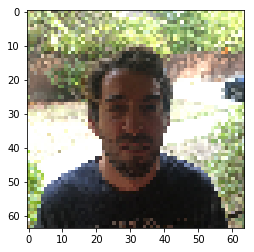

In [90]:
### START CODE HERE ###
img_path = 'images/my_image.jpg'
### END CODE HERE ###
img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(happyModel.predict(x))

## 5 - Other useful functions in Keras (Optional)

Two other basic features of Keras that you'll find useful are:
- `model.summary()`: prints the details of your layers in a table with the sizes of its inputs/outputs
- `plot_model()`: plots your graph in a nice layout. You can even save it as ".png" using SVG() if you'd like to share it on social media ;). It is saved in "File" then "Open..." in the upper bar of the notebook.

Run the following code.

In [89]:
happyModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_30 (InputLayer)        (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_30 (ZeroPaddi (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 68, 68, 32)        896       
_________________________________________________________________
bn0 (BatchNormalization)     (None, 68, 68, 32)        128       
_________________________________________________________________
activation_28 (Activation)   (None, 68, 68, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 34, 34, 32)        0         
_________________________________________________________________
flatten_28 (Flatten)         (None, 36992)             0         
__________

In [91]:
plot_model(happyModel, to_file='HappyModel.png')
#SVG(model_to_dot(happyModel).create(prog='dot', format='svg'))

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.